In [6]:
# Code to install the required libraries
!pip install numpy argparse imutils opencv-python-headless matplotlib
pip install scipy

Defaulting to user installation because normal site-packages is not writeable
  Using cached argparse-1.4.0-py2.py3-none-any.whl.metadata (2.8 kB)
Using cached argparse-1.4.0-py2.py3-none-any.whl (23 kB)


Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\Program Files\Python312\Lib\tkinter\__init__.py", line 1968, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "C:\Users\areeb\AppData\Local\Temp\ipykernel_25876\1911792914.py", line 109, in marksGraph
    with open("marks.txt", "r") as file:
         ^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\areeb\AppData\Roaming\Python\Python312\site-packages\IPython\core\interactiveshell.py", line 324, in _modified_open
    return io_open(file, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
FileNotFoundError: [Errno 2] No such file or directory: 'marks.txt'
Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\Program Files\Python312\Lib\tkinter\__init__.py", line 1968, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "C:\Users\areeb\AppData\Local\Temp\ipykernel_25876\1911792914.py", line 109, in marksGraph
    with open("marks.txt", "r") as f

[INFO] score: 80.00%


Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\Program Files\Python312\Lib\tkinter\__init__.py", line 1968, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "C:\Users\areeb\AppData\Local\Temp\ipykernel_25876\1911792914.py", line 101, in uploadPaper
    cv2.imshow("Original", image)
cv2.error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1301: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvShowImage'

Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\Program Files\Python312\Lib\tkinter\__init__.py", line 1968, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "C:\Users\areeb\AppData\Local\Temp\ipykernel_25876\1911792914.py", line 40, in uploadPap

[INFO] score: 80.00%


Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\Program Files\Python312\Lib\tkinter\__init__.py", line 1968, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "C:\Users\areeb\AppData\Local\Temp\ipykernel_25876\1911792914.py", line 101, in uploadPaper
    cv2.imshow("Original", image)
cv2.error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1301: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvShowImage'

Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\Program Files\Python312\Lib\tkinter\__init__.py", line 1968, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "C:\Users\areeb\AppData\Local\Temp\ipykernel_25876\1911792914.py", line 40, in uploadPap

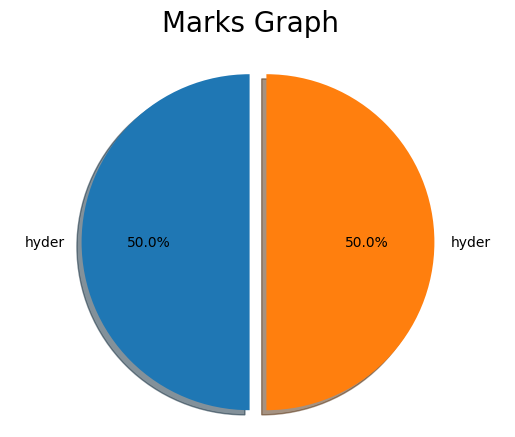

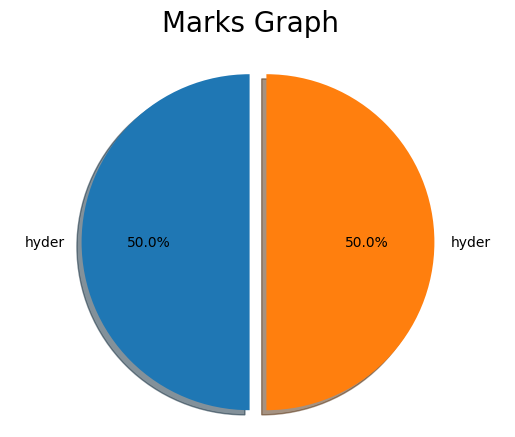

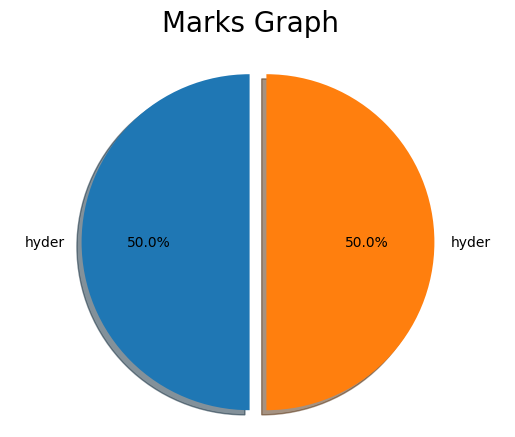

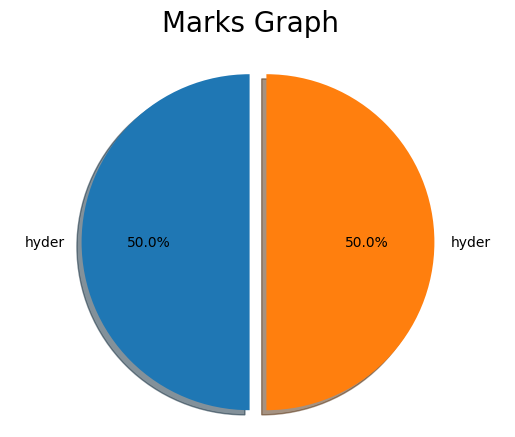

[INFO] score: 20.00%


Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\Program Files\Python312\Lib\tkinter\__init__.py", line 1968, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "C:\Users\areeb\AppData\Local\Temp\ipykernel_25876\1911792914.py", line 101, in uploadPaper
    cv2.imshow("Original", image)
cv2.error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1301: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvShowImage'



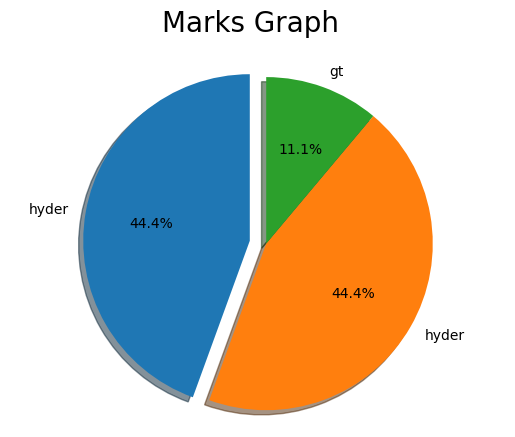

KeyboardInterrupt: 

In [5]:
from tkinter import messagebox
from tkinter import *
from tkinter import simpledialog
import tkinter
from tkinter.filedialog import askopenfilename
from tkinter import simpledialog
from imutils.perspective import four_point_transform
from imutils import contours
import numpy as np
import argparse
import imutils
import cv2
import matplotlib.pyplot as plt

main = tkinter.Tk()
main.title("Faculty Login Screen")
main.geometry("1200x1200")

global paper
global newwin

ANSWER_KEY = {0: 1, 1: 4, 2: 0, 3: 3, 4: 1}

global password_login_entry
global username_login_entry

global username_verify
global password_verify

username_verify = StringVar()
password_verify = StringVar()

def uploadPaper():
    global newwin
    sname = simpledialog.askstring("Enter Student Name", "Enter Student Name", parent=newwin)
    global paper
    paper = askopenfilename(initialdir="images")

    image = cv2.imread(paper)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    edged = cv2.Canny(blurred, 75, 200)

    cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    docCnt = None

    if len(cnts) > 0:
        cnts = sorted(cnts, key=cv2.contourArea, reverse=True)
        for c in cnts:
            peri = cv2.arcLength(c, True)
            approx = cv2.approxPolyDP(c, 0.02 * peri, True)
            if len(approx) == 4:
                docCnt = approx
                break

    paper = four_point_transform(image, docCnt.reshape(4, 2))
    warped = four_point_transform(gray, docCnt.reshape(4, 2))

    thresh = cv2.threshold(warped, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

    cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    questionCnts = []

    for c in cnts:
        (x, y, w, h) = cv2.boundingRect(c)
        ar = w / float(h)

        if w >= 20 and h >= 20 and ar >= 0.9 and ar <= 1.1:
            questionCnts.append(c)

    questionCnts = contours.sort_contours(questionCnts, method="top-to-bottom")[0]
    correct = 0

    for (q, i) in enumerate(np.arange(0, len(questionCnts), 5)):
        cnts = contours.sort_contours(questionCnts[i:i + 5])[0]
        bubbled = None
        for (j, c) in enumerate(cnts):
            mask = np.zeros(thresh.shape, dtype="uint8")
            cv2.drawContours(mask, [c], -1, 255, -1)
            mask = cv2.bitwise_and(thresh, thresh, mask=mask)
            total = cv2.countNonZero(mask)
            if bubbled is None or total > bubbled[0]:
                bubbled = (total, j)

        color = (0, 0, 255)
        k = ANSWER_KEY[q]

        if k == bubbled[1]:
            color = (0, 255, 0)
            correct += 1
        cv2.drawContours(paper, [cnts[k]], -1, color, 3)

    score = (correct / 5.0) * 100
    f = open("marks.txt", "a+")
    f.write(sname + "," + str(score) + "\n")
    f.close()
    print("[INFO] score: {:.2f}%".format(score))
    cv2.putText(paper, "{:.2f}%".format(score), (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 0, 255), 2)
    cv2.imshow("Original", image)
    cv2.imshow("Exam", paper)
    cv2.waitKey(0)
    
def marksGraph():
    names = []
    marks = []
    explode = []
    with open("marks.txt", "r") as file:
        for line in file:
            line = line.strip('\n')
            arr = line.split(",")
            names.append(arr[0])
            marks.append(float(arr[1]))
            explode.append(0)

    explode[0] = 0.1
    fig1, ax1 = plt.subplots()
    fig1.suptitle('Marks Graph', fontsize=20)
    ax1.pie(marks, explode=explode, labels=names, autopct='%1.1f%%', shadow=True, startangle=90)
    ax1.axis('equal')
    plt.show()

def loadPaper():
    global main
    global newwin
    font1 = ('times', 14, 'bold')
    newwin = Toplevel(main)
    newwin.geometry("1200x1200")
    main.withdraw()
    
    uploadbutton = Button(newwin, text="Upload MCQ Paper", command=uploadPaper)
    uploadbutton.place(x=400, y=50)
    uploadbutton.config(font=font1)  

    markschart = Button(newwin, text="View Marks Graph", command=marksGraph)
    markschart.place(x=400, y=100)
    markschart.config(font=font1)

def viewmarks():
    index = 0
    sname = simpledialog.askstring("Enter Your Name", "Enter Your Name", parent=main)
    with open("marks.txt", "r") as file:
        for line in file:
            line = line.strip('\n')
            arr = line.split(",")
            if arr[0] == sname:
                messagebox.showinfo("View Marks Screen", "Your Marks : " + arr[1])
                index = 1
    if index == 0:
        messagebox.showinfo("View Marks Screen", "Given name does not exist")    

def login():
    global password_login_entry
    global username_login_entry
    username = username_verify.get()
    password = password_verify.get()
    username_login_entry.delete(0, END)
    password_login_entry.delete(0, END)
    if username == 'faculty' and password == 'faculty':
        loadPaper()
    else:
        messagebox.showinfo("Invalid Login Details", "Invalid Login Details")

font = ('times', 20, 'bold')
title = Label(main, text='E-ASSESSMENT USING IMAGE PROCESSING IN b-EXAMS')
title.config(bg='brown', fg='white')  
title.config(font=font)
title.config(height=3, width=80)       
title.place(x=5, y=5)
font1 = ('times', 14, 'bold')
l1 = Label(main, text="Username * ")
l1.place(x=500, y=150)
l1.config(font=font1)  
username_login_entry = Entry(main, textvariable=username_verify)
username_login_entry.place(x=650, y=150)
l2 = Label(main, text="Password * ")
l2.place(x=500, y=200)
l2.config(font=font1)  
password_login_entry = Entry(main, textvariable=password_verify, show= '*')
password_login_entry.place(x=650, y=200)
upload = Button(main, text="Login", command=login)
upload.place(x=550, y=250)
upload.config(font=font1)
viewmark = Button(main, text="Student View Marks", command=viewmarks)
viewmark.place(x=550, y=300)
viewmark.config(font=font1)
main.config(bg='skyblue')
main.mainloop()